# Heart Attack

## Data Exploration and Preparation

- Age: Age of the patient

- Sex: Sex of the patient

- exng: exercise induced angina (1 = yes; 0 = no)

- ca: number of major vessels (0-3)

- cp: Chest Pain type
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic

- trtbps: resting blood pressure (in mm Hg)

- chol: cholestoral in mg/dl fetched via BMI sensor

- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

- rest_ecg: resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

- thalach: maximum heart rate achieved

- Target variable: 0 = less chance of heart attack, 1 = more chance of heart attack

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, recall_score

In [2]:
df = pd.read_csv('/content/heart.csv')

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.isna().sum()

,0
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
restecg,0
thalachh,0
exng,0
oldpeak,0


In [6]:
df[df.duplicated() == True]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [7]:
df = df.drop_duplicates(keep = 'first')

In [8]:
# check for outliers
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# check for outliers in the target column
df[(df['output'] != 0) & (df['output'] != 1)]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output


## Data Distribution

(array([138.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 164.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

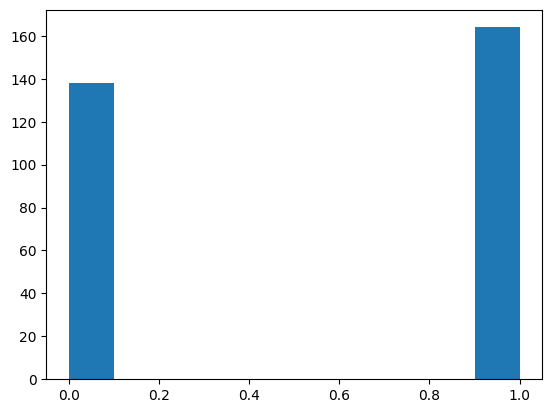

In [9]:
plt.hist(df['output'])

Hence, balanced dataset

Text(0.5, 1.0, 'Correlation Heatmap')

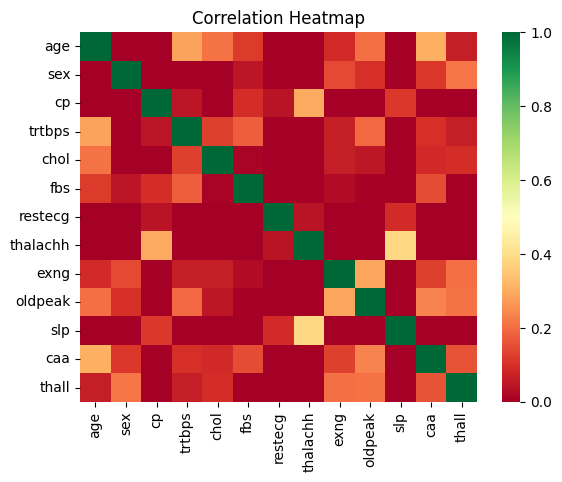

In [10]:
sns.heatmap(df.drop(columns = 'output').corr(), cmap = 'RdYlGn', vmin=0, vmax=1)
plt.title('Correlation Heatmap')

We can use this correlation graph to search for features which linearly depend on each other to prevent multicollinearity. However, there is none here.

## Feature Selection

### Split data

In [11]:
X = df.drop(columns = 'output')
y = df['output']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

### Using GridSearchCV to find best parameter for Lasso Regression

In [ ]:
X_feature = X_train.values
y_feature = y_train.values
names = df.drop(columns = 'output').columns

params = {"alpha": np.linspace(0.00001, 10, 500)}

kf = KFold(n_splits = 5, shuffle = True, random_state = 2024)

lasso = Lasso()
lasso_cv = GridSearchCV(lasso, param_grid = params, cv = kf)
lasso_cv.fit(X_train, y_train)
print(f"Best Alpha for Lasso Regression: {lasso_cv.best_params_['alpha']}")

Best Alpha for Lasso Regression: 1e-05


### Plot Feature Selection

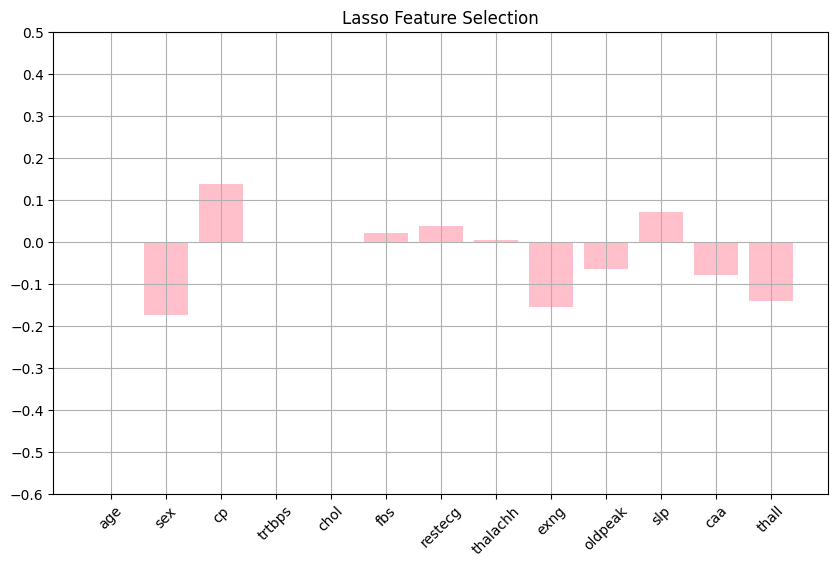

In [ ]:
lasso = Lasso(alpha = 0.00001)
lasso.fit(X_feature, y_feature)
lasso_coef = lasso.coef_

plt.figure(figsize=(10, 6))
plt.bar(names, lasso_coef, color = 'pink')
plt.yticks(np.arange(-0.6, 0.6, 0.10))
plt.grid()
plt.title('Lasso Feature Selection')
plt.xticks(rotation=45)
plt.show()

In [ ]:
lasso_df = pd.DataFrame({'Feature': names, 'Lasso Coefficient': lasso_coef})
print(lasso_df.sort_values(by = 'Lasso Coefficient'))

     Feature  Lasso Coefficient
1        sex          -0.174284
8       exng          -0.155892
12     thall          -0.140346
11       caa          -0.079635
9    oldpeak          -0.065090
3     trtbps          -0.001229
4       chol          -0.000904
0        age           0.000190
7   thalachh           0.002946
5        fbs           0.019464
6    restecg           0.036528
10       slp           0.071456
2         cp           0.136677


#### After training and testing, I have found that dropping two features with lowest coefficient: age, chol works best for Logistic Regression and Random Forest. On the other hand, dropping three features: age, chol, thalachh works best for kNN. This is in term of recall score.

In [12]:
X_train2 = X_train.drop(columns = ['age', 'chol'])
X_test2 = X_test.drop(columns = ['age', 'chol'])

X_train3 = X_train.drop(columns = ['age', 'chol', 'thalachh'])
X_test3 = X_test.drop(columns = ['age', 'chol', 'thalachh'])

## Data Prediction
As we need to minimize the numbers of people who actually are in risk for heart attack but got predicted as no risk, I will be prioritizing reducing False Negative (FN) and recall score.

### Neural Network

In [157]:
import torch
from torch.utils.data import TensorDataset, DataLoader, random_split
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import confusion_matrix, classification_report

In [158]:
features = torch.tensor(X_train2.to_numpy()).float()
target = torch.tensor(y_train.to_numpy()).float()

dataset = TensorDataset(features, target)
train_size = int(0.8 * len(dataset))  # 80% for training
val_size = len(dataset) - train_size  # 20% for validation

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
train_loader = DataLoader(train_dataset, batch_size=32)
val_loader = DataLoader(val_dataset, batch_size=32)

In [159]:
model = nn.Sequential(
    nn.Linear(X_train2.shape[1], 10),
    nn.ReLU(),
    nn.BatchNorm1d(10), # Normalize the activations of each layer in a neural network.

    nn.Linear(10, 20),
    nn.ReLU(),
    nn.BatchNorm1d(20),

    nn.Linear(20, 2),
    nn.Sigmoid()
)

criterion = nn.CrossEntropyLoss()

# Adam automatically adjusts the learning rate with builit-in momentum-like behavior
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-3)
# L2 Regularization (Weight Decay)

In [160]:
num_epochs = 20
train_loss = []
val_loss = []

for epoch in range(num_epochs):
    model.train()
    training_loss = 0.0

    for data in train_loader:
        # Set the gradients to zero
        optimizer.zero_grad()
        feature, target = data
        pred = model(feature)

        loss = criterion(pred, target.long())
        loss.backward()
        optimizer.step()

        training_loss += loss.item()  # Accumulate batch losses

    # Compute average training loss per epoch
    epoch_train_loss = training_loss / len(train_loader)
    train_loss.append(epoch_train_loss)

    # Validation Phase
    model.eval()  # Set model to evaluation mode
    validation_loss = 0.0  # Reset before validation loop

    with torch.no_grad():
        for data in val_loader:
            feature, target = data
            pred = model(feature)

            # Shift target to match model output range
            loss = criterion(pred, target.long())

            validation_loss += loss.item()  # Accumulate batch losses

    # Compute average validation loss per epoch
    epoch_val_loss = validation_loss / len(val_loader)
    val_loss.append(epoch_val_loss)


    print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {epoch_train_loss:.4f}, Val Loss: {epoch_val_loss:.4f}")

model.train()

Epoch 1/20 - Train Loss: 0.6743, Val Loss: 0.7184
Epoch 2/20 - Train Loss: 0.6643, Val Loss: 0.7132
Epoch 3/20 - Train Loss: 0.6559, Val Loss: 0.7047
Epoch 4/20 - Train Loss: 0.6457, Val Loss: 0.6910
Epoch 5/20 - Train Loss: 0.6374, Val Loss: 0.6793
Epoch 6/20 - Train Loss: 0.6285, Val Loss: 0.6695
Epoch 7/20 - Train Loss: 0.6191, Val Loss: 0.6618
Epoch 8/20 - Train Loss: 0.6119, Val Loss: 0.6550
Epoch 9/20 - Train Loss: 0.6041, Val Loss: 0.6467
Epoch 10/20 - Train Loss: 0.5988, Val Loss: 0.6362
Epoch 11/20 - Train Loss: 0.5925, Val Loss: 0.6248
Epoch 12/20 - Train Loss: 0.5863, Val Loss: 0.6150
Epoch 13/20 - Train Loss: 0.5797, Val Loss: 0.6067
Epoch 14/20 - Train Loss: 0.5730, Val Loss: 0.6023
Epoch 15/20 - Train Loss: 0.5663, Val Loss: 0.5982
Epoch 16/20 - Train Loss: 0.5595, Val Loss: 0.5922
Epoch 17/20 - Train Loss: 0.5529, Val Loss: 0.5848
Epoch 18/20 - Train Loss: 0.5466, Val Loss: 0.5798
Epoch 19/20 - Train Loss: 0.5404, Val Loss: 0.5783
Epoch 20/20 - Train Loss: 0.5342, Val Lo

Sequential(
  (0): Linear(in_features=11, out_features=10, bias=True)
  (1): ReLU()
  (2): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): Linear(in_features=10, out_features=20, bias=True)
  (4): ReLU()
  (5): BatchNorm1d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): Linear(in_features=20, out_features=2, bias=True)
  (7): Sigmoid()
)

In [161]:
features_test = torch.tensor(X_test2.to_numpy()).float()
target_test = torch.tensor(y_test.to_numpy()).float()

test_dataset = TensorDataset(features_test, target_test)
test_loader = DataLoader(test_dataset, batch_size = 32)

In [162]:
model.eval()

testing_loss = 0.0
correct = 0
total = 0
all_preds = []
all_targets = []

with torch.no_grad():
    for data in test_loader:
        feature, target = data
        pred = model(feature)

        loss = criterion(pred, target.long())
        testing_loss += loss.item()

        # Compute for Confusion Matrix and Classification report
        _, predicted = torch.max(pred, 1) # Get class with highest probability
        correct += (predicted == target).sum().item()
        total += target.size(0)

        # Store results for Confusion Matrix
        all_preds.extend(predicted.cpu().numpy())
        all_targets.extend(target.cpu().numpy())

print(f'Testing Loss: {testing_loss:.4f}')

Testing Loss: 1.7291


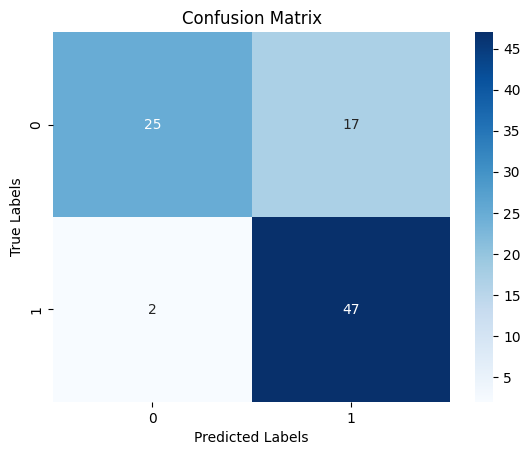

In [163]:
conf_matrix = confusion_matrix(all_targets, all_preds)

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [164]:
class_report = classification_report(all_targets, all_preds)
print(class_report)

              precision    recall  f1-score   support

         0.0       0.93      0.60      0.72        42
         1.0       0.73      0.96      0.83        49

    accuracy                           0.79        91
   macro avg       0.83      0.78      0.78        91
weighted avg       0.82      0.79      0.78        91



In [165]:
mean_train_loss = sum(train_loss) / len(train_loss)
mean_val_loss = sum(val_loss) / len(val_loss)

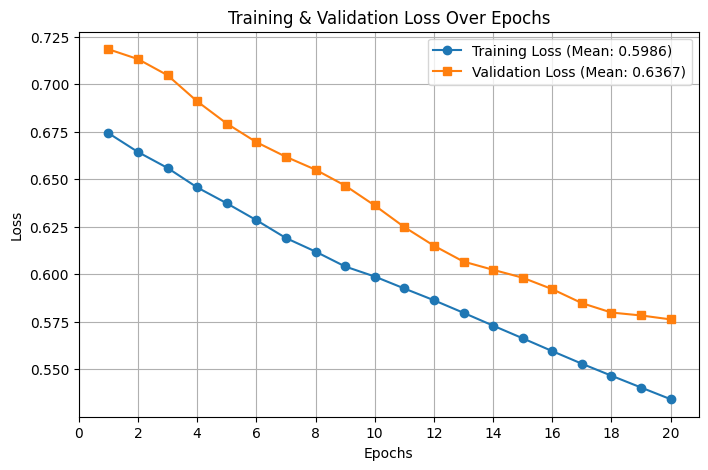

In [166]:
# Plot the Loss Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, num_epochs + 1), train_loss, label=f'Training Loss (Mean: {mean_train_loss:.4f})', marker='o')
plt.plot(range(1, num_epochs + 1), val_loss, label=f'Validation Loss (Mean: {mean_val_loss:.4f})', marker='s')
plt.xticks(range(0, 21, 2))

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss Over Epochs')
plt.legend()
plt.grid()
plt.show()

#### My model overfits as shown in higher validation loss than training loss and very high testing loss. However, it provided the good recall score. Further improvement is still needed.